<a href="https://colab.research.google.com/github/cafechungkhoan/lyd-report/blob/main/SHB_10012021_comment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LYD - Comment Sentiment Analysis**

*LYD là hệ thống áp dụng Deep Learning dùng để quét, tóm tắt, phân tích và dự báo cảm xúc của nhà đầu tư. Với mục đích hỗ trợ nghiệp vụ tư vấn IR (Investor Relation)*

**Dữ liệu input**: 
là dữ liệu bình luận (text) của nhà đầu tư trên mạng xã hội và các diễn đàn chứng khoán lớn. Quy mô tracking 700k user

**Các Model áp dụng**: 
Bert, transformer, SVM, PhoBERT 

### **LYD trả lời các câu hỏi chính**:
* **Mã cổ phiếu của doanh nghiệp có được nhà đầu tư yêu thích không?** (Áp dụng Text Classification Model xác định trạng thái cảm xúc của nhà đầu tư hiện tại là tích cực (hài lòng) hay tiêu cực (không hài lòng) về cổ phiếu YYY được xác định trước.)
* **Nhà đầu tư đang bàn tán gì về cổ phiếu doanh nghiệp?** (Áp dụng Topic Cluster Model phân loại các chủ đề chính cơ bản / kĩ thuật / thời sự & vĩ mô / tin đồn) của cổ phiếu YYY được xác định trước.)
* **Đâu là chủ đề nhà đầu tư thích nhất về cổ phiếu?** (Áp dụng BERT Text Summarize để tóm tắt nội dung comment)

---

In [ ]:
#@title Input Parameter
a = input('Nhập mã cần search: ')
b= input('Nhập giới hạn comment: ')

Nhập mã cần search: shb
Nhập giới hạn comment: 1000


## **Phân tích người tham gia bình luận**

Ý nghĩa của biểu đồ: Biểu diễn bằng chart violin, quan sát mật độ phân phối số lượng bình luận của các user
*   Xác định có vấn đề seeding bình luận ảo không
*   Xác định nhóm người theo sentiment



Số bình luận =  1000 . Số người tham gia bình luận =  275 . Median comment / user =  1.0


Text(0.5, 1.0, 'ViolinPlot số lượng comment của người tham gia bình luận')

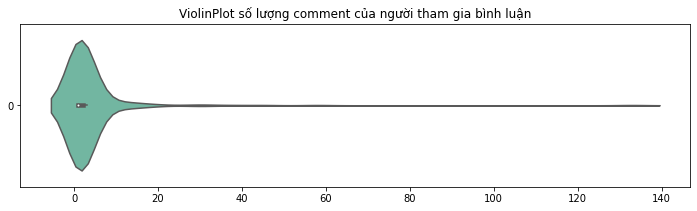

In [ ]:
#@title    

import matplotlib.pyplot as plt
import seaborn as sns
so_nguoi = data.groupby('user.name').count().reset_index()
print('Số bình luận = ',len(data),'. Số người tham gia bình luận = ', len(so_nguoi),'. Median comment / user = ', so_nguoi['originalContent'].median())
plt.figure(figsize = (12,3))
sns.violinplot(data=so_nguoi['originalContent'], orient="h", palette="Set2").set_title('ViolinPlot số lượng comment của người tham gia bình luận')

# **Visualize Sentiment Analysis**

Ý nghĩa của biểu đồ: Biểu diễn số lượng bình luận tích cực / tiêu cực / trung tính theo khung thời gian.
* Positive Comment: Bình luận được máy nhận diện là tích cực
* Negative Comment: Bình luận được máy nhận diện là tiêu cực
* Neutral Comment: Bình luận được máy nhận diện là không có trạng thái cảm xúc (hoặc máy không nhận diện được)

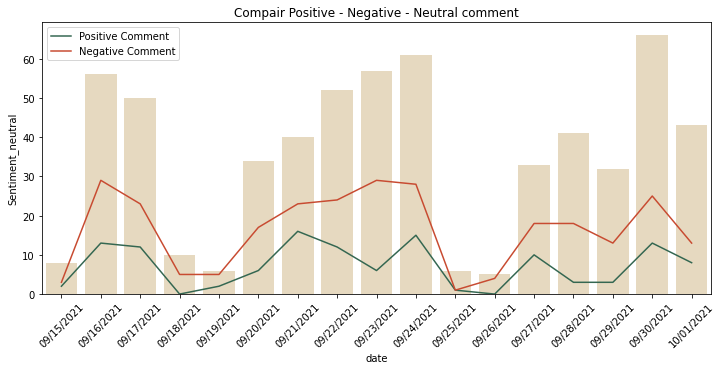

In [ ]:
#@title Visualize Sentiment Analysis { vertical-output: true }
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

x = data1['Sentiment_positive']
y = data1['date']
z = data1['Sentiment_negative']
neu = data1['Sentiment_neutral']

import seaborn as sns
sns.set_color_codes("muted")
plt.figure(figsize = (12,5))
plt.xticks(rotation=45)
plt.title('Compair Positive - Negative - Neutral comment')
sns.lineplot(x=y, y=x,label="Positive Comment", color="#346751")
sns.lineplot(x=y,y =z, label ="Negative Comment", color = '#C84B31')
sns.barplot(x=y,y =neu, label ="Neutral Comment", color = '#ECDBBA')

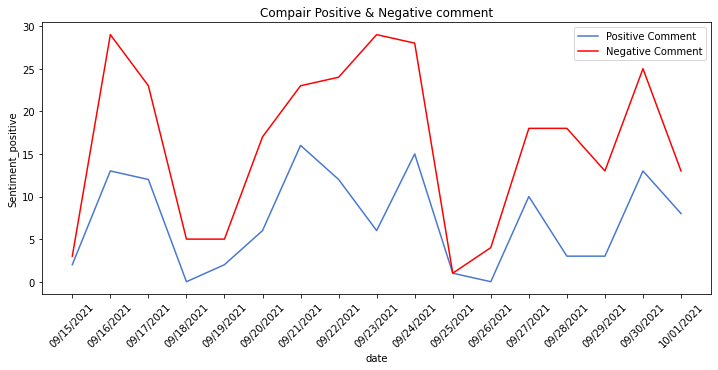

In [ ]:
#@title Drop Neutral { vertical-output: true }
import seaborn as sns
sns.set_color_codes("muted")
plt.figure(figsize = (12,5))
plt.xticks(rotation=45)
plt.title('Compair Positive & Negative comment')
sns.lineplot(x=y, y=x,label="Positive Comment", color="b")
sns.lineplot(x=y,y =z, label ="Negative Comment", color = 'red')

In [ ]:
#@title Topic Cluster Processing... { vertical-output: true }
# #import packages to use
# from google.colab import files
# p = files.upload()
# import io
# df1 = pd.read_excel(io.BytesIO(p['topic cluster.xlsx']))
#----------------------------------------
import pandas as pd
url = 'https://github.com/cafechungkhoan/chu_gia/blob/master/topic%20cluster.xlsx?raw=true'
df1 = pd.read_excel(url)

In [ ]:
#@title Topic Cluster Processing ...
# Topic cluster
import pandas as pd
df1_tokenize = df1['keyword'].to_list()
df1_topic_cluster = df1['topic_cluster'].to_list()
data['topic_cluster'] = data['Content_Processed']
for i in range(len(df1_tokenize)-1):
    data['topic_cluster'] = data['topic_cluster'].map(lambda x: re.sub(df1_tokenize[i],df1_topic_cluster[i], x))

# from collections import OrderedDict
# data['topic_cluster'] = (data['topic_cluster'].str.split().apply(lambda x: OrderedDict.fromkeys(x).keys()).str.join(' '))
# data.head()

co_ban = data[data['topic_cluster'].str.contains("cơ_bản")].drop(['topic_cluster'],axis = 1)
ki_thuat = data[data['topic_cluster'].str.contains("kĩ_thuật")].drop(['topic_cluster'],axis = 1)
vi_mo = data[data['topic_cluster'].str.contains("vĩ_mô")].drop(['topic_cluster'],axis = 1)
tin_don = data[data['topic_cluster'].str.contains("tin_đồn")].drop(['topic_cluster'],axis = 1)
tin_don_graph = tin_don

# **Visualize Topic Cluster**

Ý nghĩa biểu đồ: Phân loại comment theo 4 nhóm: Cơ bản / Kĩ thuật / Vĩ mô / Tin đồn. Và nhận diện cảm xúc (tích cực / tiêu cực) trên từng loại topic

Text(0.5, 1.0, 'Topic Tin đồn')

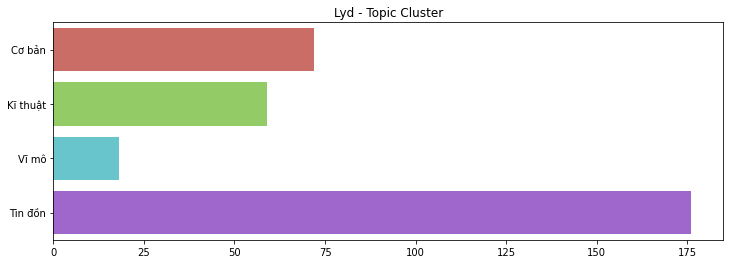

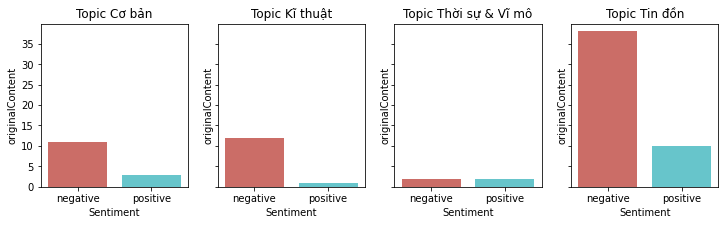

In [ ]:
#@title Visualize Topic Cluster { vertical-output: true }
import matplotlib.pyplot as plt
labels = ['Cơ bản', 'Kĩ thuật', 'Vĩ mô', 'Tin đồn']
sizes = [len(co_ban), len(ki_thuat), len(vi_mo), len(tin_don)]
import seaborn as sns
plt.figure(figsize = (12,4))
sns.barplot(x=sizes, y=labels, palette="hls").set_title("Lyd - Topic Cluster")

a = co_ban.groupby('Sentiment').count().reset_index()
b = ki_thuat.groupby('Sentiment').count().reset_index()
c = vi_mo.groupby('Sentiment').count().reset_index()
d = tin_don.groupby('Sentiment').count().reset_index()
fig, axes = plt.subplots(1, 4, figsize=(12.14, 3), sharey=True)
# color = ['#fc3d03','']
sns.barplot(ax=axes[0] , x=a['Sentiment'], y=a['originalContent'],data = a, palette="hls").set_title("Topic Cơ bản")
sns.barplot(ax=axes[1] , x=b['Sentiment'], y=b['originalContent'],data = b, palette="hls").set_title("Topic Kĩ thuật")
sns.barplot(ax=axes[2] , x=c['Sentiment'], y=c['originalContent'],data = c, palette="hls").set_title("Topic Thời sự & Vĩ mô")
sns.barplot(ax=axes[3] , x=d['Sentiment'], y=d['originalContent'],data = d, palette="hls").set_title("Topic Tin đồn")

In [ ]:
#@title Số người comment từng loại { run: "auto", vertical-output: true }
a = co_ban.groupby('user.name')
print('Số comment cơ bản = ',len(co_ban),'. Số người tham gia comment = ', len(a))
b = ki_thuat.groupby('user.name')
print('Số comment kĩ thuật = ',len(ki_thuat),'. Số người tham gia comment = ', len(b))
c = vi_mo.groupby('user.name')
print('Số comment thời sự & vĩ mô = ',len(vi_mo),'. Số người tham gia comment = ', len(c))
d = tin_don.groupby('user.name')
print('Số comment tin đồn = ',len(tin_don),'. Số người tham gia comment = ', len(d))

Số comment cơ bản =  72 . Số người tham gia comment =  37
Số comment kĩ thuật =  59 . Số người tham gia comment =  48
Số comment thời sự & vĩ mô =  18 . Số người tham gia comment =  14
Số comment tin đồn =  176 . Số người tham gia comment =  75


## **Text Summarization (tin đồn) using BERT**

In [ ]:
tin_don_show = tin_don.drop(['Content_Processed','Sentiment','Content_Tokenize'], axis = 1)
tin_don_show

index  ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Text_Summarize
0    0      ...  Bài mới bây giờ của SHB là lái sang tay tạo vol hút nhỏ lẻ vào vì tin vào việc đánh trần như trước nhưng điều này sẽ khó xảy ra nữa nó sẽ sideway trong biên độ giá từ 25-27 trước khi chuyển sàn, chủ yếu bây giờ lái sang tay bán ra khối lượng lớn tạo tâm lý cho nhỏ lẻ bán tháo và chán nản.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
1    4      ...  Nói qua tháng 11 mới đẩy mà ko tín.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
2    8      ...  Tao khẳng định có chuyển sàn cũng không có game tăng để các bố hưởng lợi đâu vì ai cũng biết và hóng                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

## **Graph Knowledge tin_don**

# **Chi tiết 1000 comment gần nhất**

In [ ]:
data2 = data
data2 = data.drop(['Content_Processed','Sentiment','Content_Tokenize','topic_cluster'] , axis = 1)
data2

originalContent  ...                                        user.name
0    Bài mới bây giờ của SHB là lái sang tay tạo vol hút nhỏ lẻ vào vì tin vào việc đánh trần như trước nhưng điều này sẽ khó xảy ra nữa nó sẽ sideway trong biên độ giá từ 25-27 trước khi chuyển sàn, chủ yếu bây giờ lái sang tay bán ra khối lượng lớn tạo tâm lý cho nhỏ lẻ bán tháo và chán nản. SHB do SHS tạo sóng vì cùng nhà mua bán khối lượng giao dịch lớn phí thì cũng trong nhà hưởng, SHB chuyển sàn khả năng mới được kéo, SHB chọn thời điểm quý 4 để chuyển sàn là có lý do và cũng là thời điểm thích hợp khi việc kiểm soát dịch bệnh đã ổn định, kinh tế mở cửa và phục hồi,.... Hiện trên diễn đàn có nhiều ông Lái bà Lái nói này nói kia về giá này giá kia nhưng theo quan điểm của tôi thì mốc 25-26 là giữ được. Hiện tại tôi và gia đình đang nắm giữ rất rất nhiều cổ SHB giá lúc 8k.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       